In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime
from sklearn.metrics import fbeta_score,roc_auc_score
#from mochi import f_beta_01

In [14]:
import re

In [3]:
class Config:
    pass
config = pd.read_pickle('config.pkl')
data_path = config.data_path
feature_path = config.feature_path
#print(dir(config))
print('Currently has feature-sets')
print(config.feature_dict.keys())

Currently has feature-sets
dict_keys(['trade_and_recent_login_comparing', 'recent_login_detail', 'trade_detail_feature', 'login_trade_hist_stats', 'llc_user_habbit', 'hcc_user_habbit', 'hcc_properties', 'hcc_target_encoding', 'login_detail_new_features', 'hcc_mult_target_encoding', 'hcc_user_trade_habbit', 'hcc_trade_properties'])


In [4]:
print(dir(config))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'chi_test_result', 'data_path', 'feature_dict', 'feature_path', 'model_features', 'result_path', 'single_module_validation_indice_set', 'trade_train_size', 'train_2_6_index']


In [5]:
features =   (config.feature_dict['trade_detail_feature']+
              config.feature_dict['recent_login_detail']+
              config.feature_dict['trade_and_recent_login_comparing']+
              config.feature_dict['login_trade_hist_stats']+
              config.feature_dict['llc_user_habbit']+
             config.feature_dict['hcc_user_habbit']+
              config.feature_dict['hcc_properties']+
            config.feature_dict['hcc_target_encoding']+
                    config.feature_dict['login_detail_new_features']+
              config.feature_dict['hcc_trade_properties']+
              config.feature_dict['hcc_mult_target_encoding']+
              config.feature_dict['hcc_user_trade_habbit']
             )
feature_sequence_list = []
for feature in features:
    feature_sequence_list.append(pd.read_pickle(feature_path+feature+'.pkl').reshape(-1,1))
    
trade_tt_mat = np.hstack(feature_sequence_list)
#trade_tt_mat[trade_tt_mat==-10]=np.nan

validation_tuple_list = config.single_module_validation_indice_set
train_labels = pd.read_pickle(data_path+'trade_train_label.pkl')

### Genral feature analysis

In [6]:
#check nan
#features_ori_index = [features.index(x) for x in features]
for feature in features:
    try:
        if np.sum(np.isnan(trade_tt_mat[:,features.index(feature)].astype(np.float)))>0:
            print("nan exist for %s",feature)
    except:
        print("failed to check nan for %s, type is %s" % (feature,''))
              
    try:
        if np.sum(trade_tt_mat[:,features.index(feature)].astype(np.float)==np.inf)>0:
            print("inf exist for %s",feature)
    except:
        print("failed to check inf for %s, type is %s" % (feature,''))
    try:
        if np.sum(trade_tt_mat[:,features.index(feature)].astype(np.float)==-np.inf)>0:
            print("-inf exist for %s",feature)
    except:
        print("failed to check -inf for %s, type is %s" % (feature,''))
    

In [7]:
#checking the filled nan by -10, computing the emptyness
trade_df = pd.DataFrame(trade_tt_mat,columns = features)

In [8]:
from mochi import get_feature_emptyness
emptyness = get_feature_emptyness(trade_df,features)

In [9]:
sorted(emptyness,key =lambda x : x[1],reverse = True)

[('after_fail_std_1', 0.99913011142542196),
 ('after_fail_std_3', 0.99811413469328125),
 ('after_fail_std_7', 0.99630795383614223),
 ('after_fail_max_1', 0.99587632973425233),
 ('after_fail_mean_1', 0.99587632973425233),
 ('after_fail_med_1', 0.99587632973425233),
 ('after_fail_min_1', 0.99587632973425233),
 ('after_fail_std_15', 0.99241005617753697),
 ('after_fail_max_3', 0.99199835318804197),
 ('after_fail_mean_3', 0.99199835318804197),
 ('after_fail_med_3', 0.99199835318804197),
 ('after_fail_min_3', 0.99199835318804197),
 ('trade_login_fail_rate_1', 0.98717080361767406),
 ('after_fail_std_30', 0.98641380134666723),
 ('after_fail_max_7', 0.98403654860087386),
 ('after_fail_mean_7', 0.98403654860087386),
 ('after_fail_med_7', 0.98403654860087386),
 ('after_fail_min_7', 0.98403654860087386),
 ('trade_login_fail_rate_3', 0.98162609400108902),
 ('trade_login_fail_rate_7', 0.97109446591497672),
 ('after_fail_max_15', 0.97091517590342247),
 ('after_fail_mean_15', 0.97091517590342247),
 ('

### checking nomality for the possibly numerical features

In [24]:
from scipy.stats.mstats import normaltest

In [25]:
numerical_set = []

for feature in features:
    if len(trade_df[feature].unique())<15:
        print('%s is possibly not a  numerical feature, attention' % feature)
    else:
        numerical_set.append((feature,normaltest(trade_df[feature].astype(np.float))))

weekday is possibly not a  numerical feature, attention
weekday_cycle is possibly not a  numerical feature, attention
log_from_login_0 is possibly not a  numerical feature, attention
log_from_login_1 is possibly not a  numerical feature, attention
log_from_login_2 is possibly not a  numerical feature, attention
result_login_0 is possibly not a  numerical feature, attention
result_login_1 is possibly not a  numerical feature, attention
result_login_2 is possibly not a  numerical feature, attention
type_login_0 is possibly not a  numerical feature, attention
type_login_1 is possibly not a  numerical feature, attention
type_login_2 is possibly not a  numerical feature, attention
is_scan_login_0 is possibly not a  numerical feature, attention
is_scan_login_1 is possibly not a  numerical feature, attention
is_scan_login_2 is possibly not a  numerical feature, attention
weekday_login_0 is possibly not a  numerical feature, attention
weekday_login_1 is possibly not a  numerical feature, atten

/home/ec2-user/anaconda3/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:2254: RuntimeWarning: divide by zero encountered in true_divide
  term2 = ma.power((1-2.0/A)/denom,1/3.0)


weekday_cycle_login_0 is possibly not a  numerical feature, attention
weekday_cycle_login_1 is possibly not a  numerical feature, attention
weekday_cycle_login_2 is possibly not a  numerical feature, attention
has_trade_login_0 is possibly not a  numerical feature, attention
has_trade_login_1 is possibly not a  numerical feature, attention
has_trade_login_2 is possibly not a  numerical feature, attention
recent_login_number is possibly not a  numerical feature, attention
device_comparing_login_1 is possibly not a  numerical feature, attention
device_comparing_login_2 is possibly not a  numerical feature, attention
ip_comparing_login_1 is possibly not a  numerical feature, attention
ip_comparing_login_2 is possibly not a  numerical feature, attention
city_comparing_login_1 is possibly not a  numerical feature, attention
city_comparing_login_2 is possibly not a  numerical feature, attention
log_from_comparing_login_1 is possibly not a  numerical feature, attention
log_from_comparing_logi

In [26]:
numerical_set

[('day', NormaltestResult(statistic=50668.071771006289, pvalue=0.0)),
 ('hour', NormaltestResult(statistic=5354.1538127669228, pvalue=0.0)),
 ('day_cycle', NormaltestResult(statistic=354041.16840980592, pvalue=0.0)),
 ('hour_cycle', NormaltestResult(statistic=26355.698286714785, pvalue=0.0)),
 ('timelong_login_0',
  NormaltestResult(statistic=852187.39293525228, pvalue=0.0)),
 ('timelong_login_1',
  NormaltestResult(statistic=858116.07118066575, pvalue=0.0)),
 ('timelong_login_2',
  NormaltestResult(statistic=776476.3574725358, pvalue=0.0)),
 ('day_login_0', NormaltestResult(statistic=5208.3916955270188, pvalue=0.0)),
 ('day_login_1', NormaltestResult(statistic=20587.609891121905, pvalue=0.0)),
 ('day_login_2', NormaltestResult(statistic=166801.87310569111, pvalue=0.0)),
 ('hour_login_0', NormaltestResult(statistic=30202.570113283047, pvalue=0.0)),
 ('hour_login_1', NormaltestResult(statistic=16541.03586840483, pvalue=0.0)),
 ('hour_login_2', NormaltestResult(statistic=126516.454269136

### building categories for chi-square test

In [10]:
train_trade = trade_df.iloc[config.train_2_6_index]
train_label = train_labels.iloc[config.train_2_6_index]

In [28]:
test_categorical = train_trade['weekday']
test_numerical = train_trade['timelong_login_0']

In [29]:
from scipy.stats import chi2_contingency

In [43]:
    feature = 'id_t_encoding'
    test_feature = train_trade[feature]
    test_df = pd.DataFrame([test_feature,train_label]).T
    test_df.columns = ['feature','label']
    
    if len(test_feature.unique())<20:

        test_mat = test_df.groupby(['feature','label']).size().reset_index().pivot(index  = 'feature',columns='label' ).fillna(0).as_matrix()
        
        chi2, p, dof, ex = chi2_contingency(test_mat)
    else:
        test_df['new_cat'] = -1
        """
        #original method using percentile to split
        percentile_list = [np.percentile(test_feature,x) for x in range(0,100,10)]
        percentile_list.append(test_feature.max())
        
        #check if any bar_min = bar_max
        for i in range(10):
            bar_min = percentile_list[i]
            bar_max = percentile_list[i+1]
            
            test_df.loc[(test_df['feature']>=bar_min)&(test_df['feature']<bar_max),'new_cat'] = i
            
        test_df.loc[test_df['feature']==bar_max,'new_cat'] = i
        
        """
        #allocating the value by sorting
        test_df = test_df.sort_values(by = 'feature')
        for i in range(10):
            loc_min = int(i*len(test_df)/10)
            loc_max = int((i+1)*len(test_df)/10)
            test_df.iloc[loc_min:loc_max]['new_cat'] = i
                
        test_mat = test_df.groupby(['new_cat','label']).size().reset_index().pivot(index  = 'new_cat',columns='label' ).fillna(0).as_matrix()
        
        chi2, p, dof, ex = chi2_contingency(test_mat)
    
    
    feature_chi_list.append((feature,chi2,p))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
chi2

13362.708142364263

In [48]:
feature_chi_list = []

for feature in features:
    test_feature = train_trade[feature]
    test_df = pd.DataFrame([test_feature,train_label]).T
    test_df.columns = ['feature','label']
    
    if len(test_feature.unique())<20:

        test_mat = test_df.groupby(['feature','label']).size().reset_index().pivot(index  = 'feature',columns='label' ).fillna(0).as_matrix()
        
        chi2, p, dof, ex = chi2_contingency(test_mat)
    else:
        test_df['new_cat'] = -1
        
        """
        #original method using percentile to split
        percentile_list = [np.percentile(test_feature,x) for x in range(0,100,10)]
        percentile_list.append(test_feature.max())
        
        #check if any bar_min = bar_max
        for i in range(10):
            bar_min = percentile_list[i]
            bar_max = percentile_list[i+1]
            
            test_df.loc[(test_df['feature']>=bar_min)&(test_df['feature']<bar_max),'new_cat'] = i
            
        test_df.loc[test_df['feature']==bar_max,'new_cat'] = i
        
        """
        #allocating the value by sorting
        test_df = test_df.sort_values(by = 'feature')
        for i in range(10):
            loc_min = int(i*len(test_df)/10)
            loc_max = int((i+1)*len(test_df)/10)
            test_df.iloc[loc_min:loc_max]['new_cat'] = i
                
        test_mat = test_df.groupby(['new_cat','label']).size().reset_index().pivot(index  = 'new_cat',columns='label' ).fillna(0).as_matrix()
        
        chi2, p, dof, ex = chi2_contingency(test_mat)
    
    feature_chi_list.append((feature,chi2,p))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
sorted(feature_chi_list,key = lambda x :x[1],reverse = True)

[('id_t_encoding', 13362.708142364263, 0.0),
 ('ip_t_encoding', 12791.917715879115, 0.0),
 ('city_id_t_encoding', 12250.95873280643, 0.0),
 ('device_t_encoding', 10960.61025168213, 0.0),
 ('ip_id_t_encoding', 10861.703723293464, 0.0),
 ('device_id_t_encoding', 10658.598044242539, 0.0),
 ('device_id_city_t_encoding', 10399.171525333386, 0.0),
 ('ip_device_t_encoding', 9564.7715363464013, 0.0),
 ('city_used_count_7', 5450.0769136173176, 0.0),
 ('trade_login_success_rate_1', 4832.9339475156703, 0.0),
 ('trade_login_rate_1', 4765.1423723173239, 0.0),
 ('login_distance_0_al', 4713.5089392469436, 0.0),
 ('fail_-2_rate_30', 4613.7055867654153, 0.0),
 ('timelong_std_1', 4521.0980527536576, 0.0),
 ('login_fail_times_15', 4485.1993901995938, 0.0),
 ('login_distance_1_al', 4338.5213998374638, 0.0),
 ('device_used_count_7', 3929.2556972642769, 0.0),
 ('timelong_std_3', 3892.0158725385363, 0.0),
 ('device_repeat_rate_7', 3802.9559392622477, 0.0),
 ('login_times_1', 3782.7074627369066, 0.0),
 ('city

(array([   2.,    1.,    0.,    0.,    3.,   12.,   84.,  160.,  168.,   16.]),
 array([-2.49076873, -1.29166954, -0.09257036,  1.10652883,  2.30562801,
         3.5047272 ,  4.70382639,  5.90292557,  7.10202476,  8.30112395,
         9.50022313]),
 <a list of 10 Patch objects>)

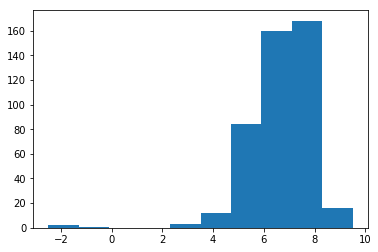

In [55]:
%matplotlib inline
plt.hist([np.log(x[1]) for x in feature_chi_list])

In [58]:
len([np.log(x[1]) for x in feature_chi_list if x[1]>400])

336

In [52]:
chi2_contingency(np.array([[1,2,3],[2,1,3]]))

(0.66666666666666663, 0.71653131057378916, 2, array([[ 1.5,  1.5,  3. ],
        [ 1.5,  1.5,  3. ]]))

In [53]:
class Config:
    pass
config = pd.read_pickle('config.pkl')

In [59]:
config.chi_test_result = feature_chi_list

In [62]:
config.model_features.keys()

dict_keys(['moded_C1_top100', 'model_h1_top250', 'model_I_top300', 'rf_best_361'])

In [63]:
pd.to_pickle(config,'config.pkl')

###  Dealing with the skewness and normalize the data

In [64]:
config.feature_dict.keys()

dict_keys(['trade_and_recent_login_comparing', 'recent_login_detail', 'trade_detail_feature', 'login_trade_hist_stats', 'llc_user_habbit', 'hcc_user_habbit', 'hcc_properties', 'hcc_target_encoding', 'login_detail_new_features', 'hcc_mult_target_encoding', 'hcc_user_trade_habbit', 'hcc_trade_properties'])

In [65]:
config.feature_dict['trade_and_recent_login_comparing']

['device_comparing_login_1',
 'device_comparing_login_2',
 'ip_comparing_login_1',
 'ip_comparing_login_2',
 'city_comparing_login_1',
 'city_comparing_login_2',
 'log_from_comparing_login_1',
 'log_from_comparing_login_2',
 'result_comparing_login_1',
 'result_comparing_login_2',
 'type_comparing_login_1',
 'type_comparing_login_2',
 'login_distance_0',
 'login_distance_1',
 'login_distance_2']

All comparing boolean except login_distance are boolean, no need to process.

Need to deal with login_distance

(array([ 15120.,   1009.,   3309.,   5271.,   5055.,   6473.,  16030.,
         19983.,  23655.,  13002.]),
 array([  2.30258509,   3.72610638,   5.14962766,   6.57314894,
          7.99667023,   9.42019151,  10.84371279,  12.26723408,
         13.69075536,  15.11427664,  16.53779793]),
 <a list of 10 Patch objects>)

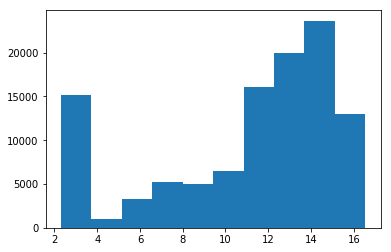

In [38]:
#dealing with login distance
%matplotlib inline
plt.hist(train_trade['login_distance_1'].astype(float))

Timelong and log are categorical results.

Use label encoding or try on hot mapping.

**The variables for cycle are abandoned**

In [ ]:
process_list = config.feature_dict['recent_login_detail']
for feature in process_list:
    if re.match('.*cycle.*',feature) or re.match('.*cycle.*',feature):
        process_list.remove()

In [26]:
k = re.match('.*cycle.*','hour_cycle_login_2')

In [27]:
k

<_sre.SRE_Match object; span=(0, 18), match='hour_cycle_login_2'>